In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *

In [16]:
data_path=Path("J:\\Users\Berners_Lukas\LEO\yolov5\\50_45\\slip")
# data_path=Path("data_files")
all_data=data_path.glob('**\All-damages*.txt')
data_list=list(all_data)

In [17]:
data_list

[WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/slip/3mm/All-damages.txt'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/slip/head/All-damages_lower.txt'),
 WindowsPath('J:/Users/Berners_Lukas/LEO/yolov5/50_45/slip/head/All-damages_upper.txt')]

In [63]:
df_data=list()
for data in data_list:
    print('i')
    df=pd.read_csv(data,header=None,names=['damage_type','x_coord','y_coord','width','height','resolution','full_width','full_height'],delimiter='\t',index_col=False)
    df.replace(2,'laves_crack',inplace=True)
    df.replace(0,'interface_decohesion',inplace=True)   
    df['filename']=data.parent.stem
    df['up_low']=data.stem[-5:]
    df['x']=df['x_coord']*df['resolution']
    df['y']=df['y_coord']*df['resolution']
    df['area']=df['resolution']*df['resolution']*df['full_width']*df['full_height']
    df_data.append(df)
plot_data=pd.concat(df_data)
plot_data.replace('possible_slip','slip',inplace=True)

i
i
i


In [65]:
plot_data[plot_data.up_low=='lower']

,damage_type,x_coord,y_coord,width,height,resolution,full_width,full_height,filename,up_low,x,y,area
0,slip,7246.0,6252.0,102,115,0.009766,32193.0,12914.0,head,lower,70.761719,61.054688,39648.094368
1,slip,7607.0,6918.0,42,30,0.009766,32193.0,12914.0,head,lower,74.287109,67.558594,39648.094368
2,slip,7127.0,16221.0,107,119,0.009766,32193.0,12914.0,head,lower,69.599609,158.408203,39648.094368
3,slip,10613.0,9945.0,93,124,0.009766,32193.0,12914.0,head,lower,103.642578,97.119141,39648.094368
4,slip,21145.0,14051.0,161,123,0.009766,32193.0,12914.0,head,lower,206.494141,137.216797,39648.094368
5,slip,25882.0,4527.0,127,74,0.009766,32193.0,12914.0,head,lower,252.753906,44.208984,39648.094368
6,slip,25875.0,14558.0,356,186,0.009766,32193.0,12914.0,head,lower,252.685547,142.167969,39648.094368
7,slip,30228.0,20068.0,89,57,0.009766,32193.0,12914.0,head,lower,295.195312,195.976562,39648.094368
8,slip,34395.0,414.0,141,174,0.009766,32193.0,12914.0,head,lower,335.888672,4.042969,39648.094368
9,slip,33228.0,2737.0,81,64,0.009766,32193.0,12914.0,head,lower,324.492188,26.728516,39648.094368


In [49]:
data.stem[-5:]

'upper'

In [51]:
from skimage import io

In [52]:
img=io.imread("J:\\Users\Berners_Lukas\LEO\yolov5\\50_45\head_yolo\eps5\panos\\pano_4kv_slip_events0000_stitch_upper_scaled.png")+

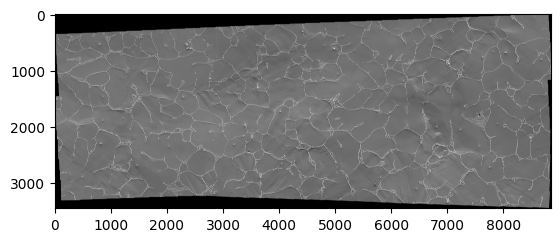

In [53]:

plt.imshow(img)

In [54]:
img.shape

(3458, 8850, 3)

In [72]:
plot_data.loc[plot_data.up_low=='upper','y_coord']=plot_data.loc[plot_data.up_low=='upper','y_coord']+12914
plot_data['y']=plot_data['y_coord']*plot_data['resolution']

In [73]:
plot_data

,damage_type,x_coord,y_coord,width,height,resolution,full_width,full_height,filename,up_low,x,y,area
0,slip,1.0,186.0,578,213,0.009766,36239.0,27800.0,3mm,mages,0.009766,1.816406,96077.365875
1,slip,2238.0,3708.0,253,157,0.009766,36239.0,27800.0,3mm,mages,21.855469,36.210938,96077.365875
2,slip,2835.0,803.0,230,225,0.009766,36239.0,27800.0,3mm,mages,27.685547,7.841797,96077.365875
3,slip,2473.0,3790.0,219,110,0.009766,36239.0,27800.0,3mm,mages,24.150391,37.011719,96077.365875
4,slip,2481.0,15755.0,137,159,0.009766,36239.0,27800.0,3mm,mages,24.228516,153.857422,96077.365875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,slip,33054.0,35152.0,167,146,0.009766,40249.0,13291.0,head,upper,322.792969,343.281250,51016.755962
14,slip,39212.0,27592.0,233,157,0.009766,40249.0,13291.0,head,upper,382.929688,269.453125,51016.755962
15,slip,39580.0,42381.0,234,366,0.009766,40249.0,13291.0,head,upper,386.523438,413.876953,51016.755962
16,slip,42625.0,32917.0,462,183,0.009766,40249.0,13291.0,head,upper,416.259766,321.455078,51016.755962


In [82]:
plot_data['filename'].unique()

array(['3mm', 'head'], dtype=object)

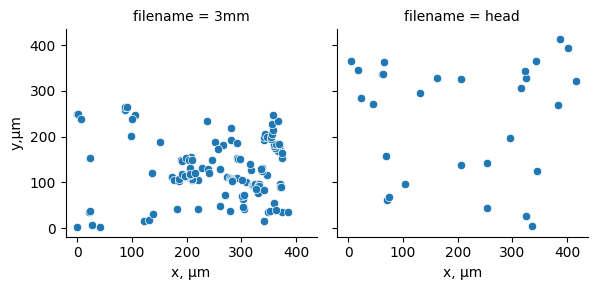

In [77]:
# %matplotlib widget
import seaborn as sns
grid=sns.FacetGrid(plot_data,col='filename')
grid.map(sns.scatterplot,'x','y')
grid.add_legend()
grid.set_xlabels("x, µm")
grid.set_ylabels("y,µm")
# sns.scatterplot(data=plot_data,x='x',y='y',hue='damage_type')


In [108]:
damage_counts=plot_data.groupby(by=['filename']).count()['x_coord']
mean_vals=plot_data.groupby(by=['filename','up_low']).agg({'area':'mean'})
normed_damage=damage_counts/ar_mean*1e6

In [103]:
plot_data.groupby(by=['filename']).count()['x_coord']

filename
3mm     124
head     29
Name: x_coord, dtype: int64

In [107]:
mean_vals
ar_mean=[96077,39648+51015]
ar_mean

[96077, 90663]

In [80]:
norm_d_2

filename,,lower,upper
damage_type,,,
slip,NaN,NaN,NaN


In [100]:

norm_d_2=normed_damage.unstack(level=1)


In [114]:
normed_damage.values

array([1290.63147267,  319.86587693])

Text(0.5, 0, 'expected number of Slip events / square mm')

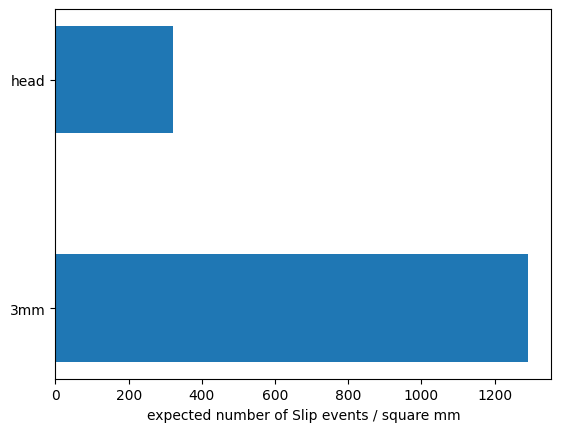

In [127]:
fig,ax=plt.subplots()

y_pos=np.arange(2)
# if_dec=normed_damage['interface_decohesion'].values
slip=normed_damage.values

h=0.47
ax.barh(y_pos,slip,height=h)
# ax.barh(y_pos+h/2,laves_crack,height=h,label='laves_crack')
# ax.legend()
ax.set_yticks(y_pos)
ax.set_yticklabels(labels=['3mm','head'])
ax.set_xlabel('expected number of Slip events / square mm')